# 라이브러리 호출 

In [1]:
import pykrx
import time
import os
import matplotlib.pyplot as plt
from pykrx import stock
import pandas as pd
import numpy as np

# 퀄리티 팩터 데이터 전처리

In [2]:
df = pd.read_csv('./datasets/low_vol_simple_rtn.csv', encoding='cp949')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.set_index('date', inplace=True)

In [4]:
df.index = pd.to_datetime(df.index, infer_datetime_format=True)

In [5]:
df_rtn = df.sort_values('date').groupby('date').simple_rtn.mean()

In [6]:
df_rtn.index = pd.to_datetime(df_rtn.index, infer_datetime_format=True)

In [7]:
df_rtn.index

DatetimeIndex(['2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
               '2010-01-15', '2010-01-18',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='date', length=2465, freq=None)

# 코스피(벤치마크) 데이터 호출

In [8]:
KS200 = stock.get_index_ohlcv("20100102","20191230",'1028')


In [9]:
# 수익률 컬럼 생성 

KS200.columns = ['Open','High','Low','Close','Volume','simple_rtn','log_rtn']
KS200['simple_rtn'] = KS200['Close'].pct_change()
KS200['log_rtn'] = np.log(KS200['Close'])/KS200['Close'].shift(1)
KS200.dropna(inplace=True)

In [10]:
KS200_rtn = KS200['simple_rtn']

In [11]:
KS200_rtn.index =  pd.to_datetime(KS200_rtn.index, infer_datetime_format=True)

In [12]:
KS200_rtn.index

DatetimeIndex(['2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
               '2010-01-15', '2010-01-18',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='날짜', length=2465, freq=None)

# pyfolio 누적 수익률

In [13]:
import pyfolio as pf

c:\Users\eicic\AppData\Local\Programs\Python\Python37\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


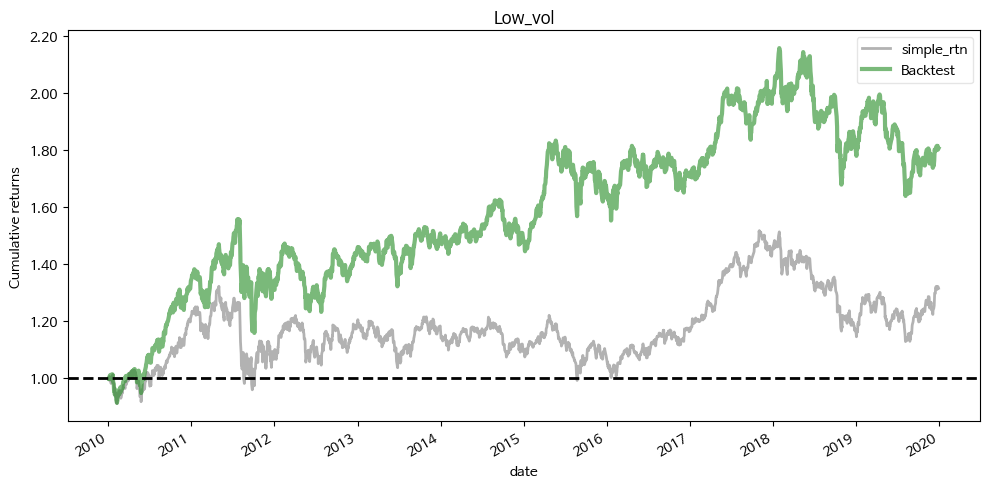

In [14]:

plt.figure(figsize=(10, 5))



pf.plotting.plot_rolling_returns(returns =df_rtn , factor_returns = KS200_rtn)
plt.title('Low_vol')


plt.tight_layout()
plt.show()

# 샤프 지수

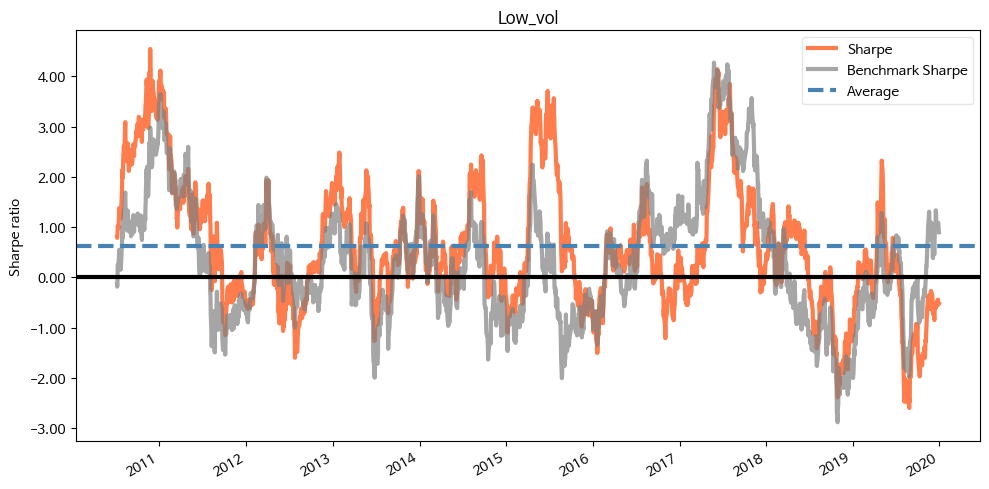

In [15]:


plt.figure(figsize=(10, 5))


pf.plotting.plot_rolling_sharpe(returns = df_rtn, factor_returns = KS200_rtn)
plt.title('Low_vol')

plt.tight_layout()
plt.show()

# MDD


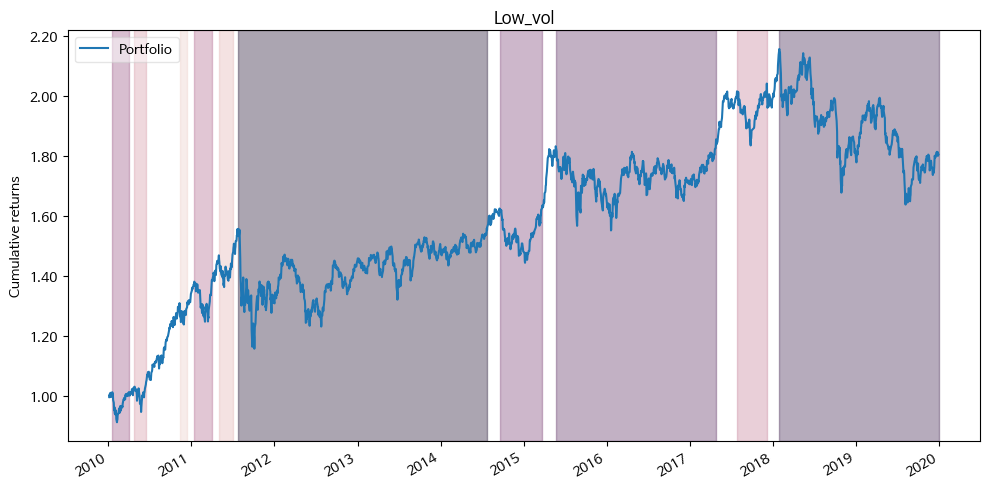

In [16]:


plt.figure(figsize=(10, 5))



pf.plot_drawdown_periods(returns = df_rtn)
plt.title('Low_vol')




plt.tight_layout()
plt.show()

# 기타 비교

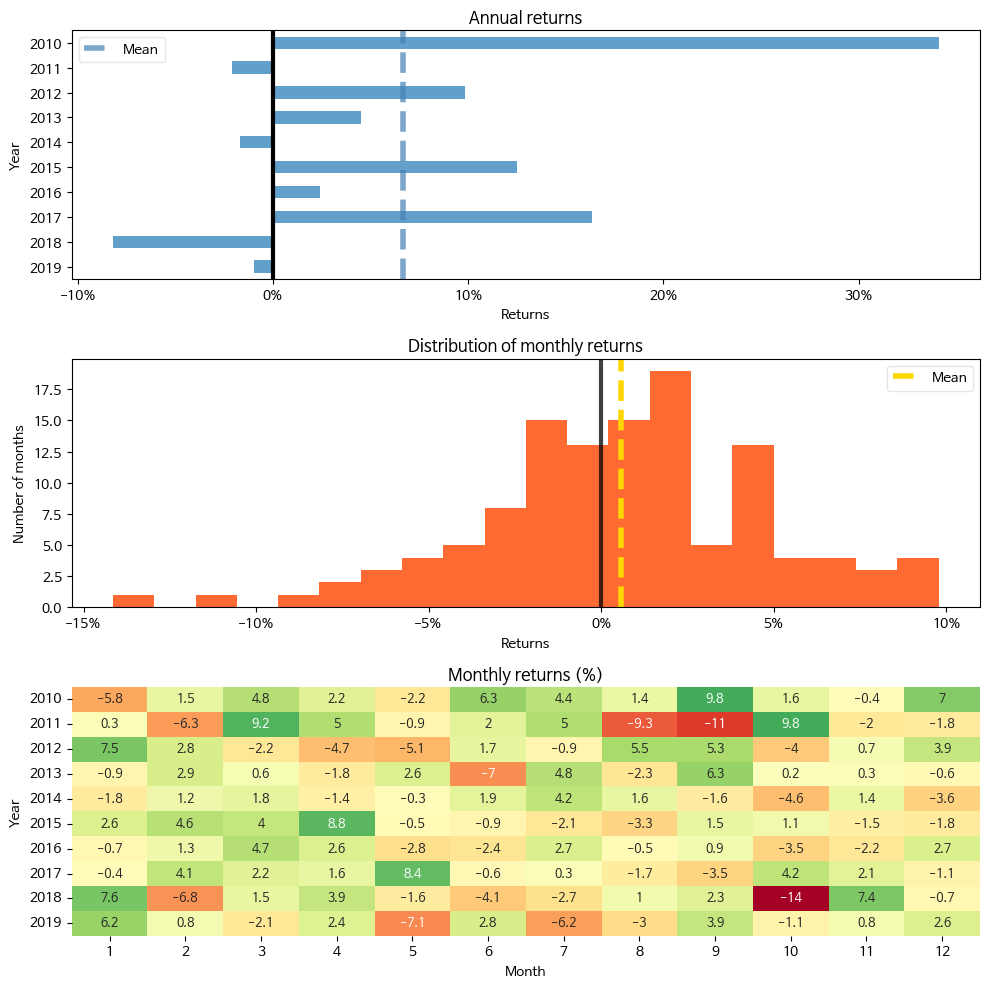

In [17]:


plt.figure(figsize=(10, 10))

# 팩터
plt.subplot(311)
pf.plot_annual_returns(df_rtn)
plt.subplot(312)
pf.plot_monthly_returns_dist(df_rtn)
plt.subplot(313)
pf.plot_monthly_returns_heatmap(df_rtn)





plt.tight_layout()
plt.show()

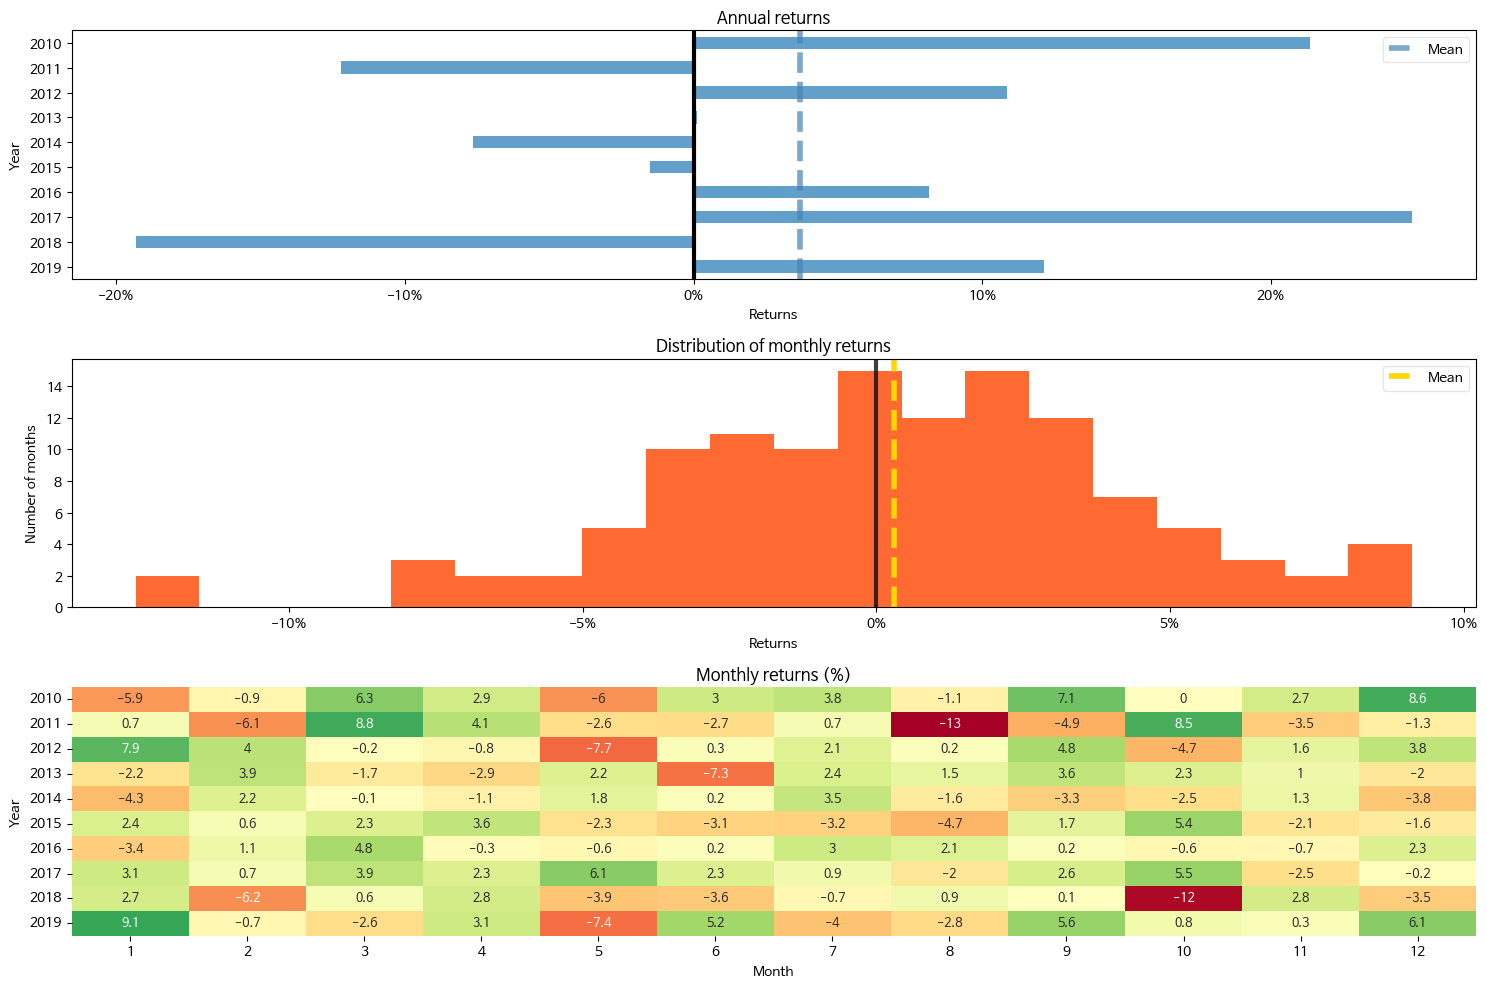

In [18]:


plt.figure(figsize=(15, 10))

# KS200
plt.subplot(311)
pf.plot_annual_returns(KS200_rtn)
plt.subplot(312)
pf.plot_monthly_returns_dist(KS200_rtn)
plt.subplot(313)
pf.plot_monthly_returns_heatmap(KS200_rtn)





plt.tight_layout()
plt.show()

Start date,2010-01-05
End date,2019-12-30
Total months,117
,Backtest
Annual return,6.227%
Cumulative returns,80.566%
Annual volatility,14.856%
Sharpe ratio,0.48
Calmar ratio,0.24
Stability,0.82
Max drawdown,-25.668%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,25.67,2011-07-27,2011-10-05,2014-07-23,781
1,24.05,2018-01-29,2019-08-07,NaT,NaN
2,15.31,2015-05-22,2016-01-20,2017-04-25,503
3,11.13,2014-09-17,2015-01-07,2015-03-23,134
4,9.89,2010-01-18,2010-02-08,2010-04-01,54


Stress Events,mean,min,max
US downgrade/European Debt Crisis,-0.41%,-5.31%,4.27%
Fukushima,0.56%,-1.61%,2.03%
EZB IR Event,0.08%,-1.09%,2.80%
Flash Crash,-0.51%,-1.92%,1.92%
Apr14,-0.06%,-1.23%,0.75%
Oct14,-0.22%,-1.62%,2.23%
Fall2015,-0.02%,-2.22%,3.47%
Recovery,0.06%,-6.15%,4.98%
New Normal,0.02%,-4.62%,3.47%


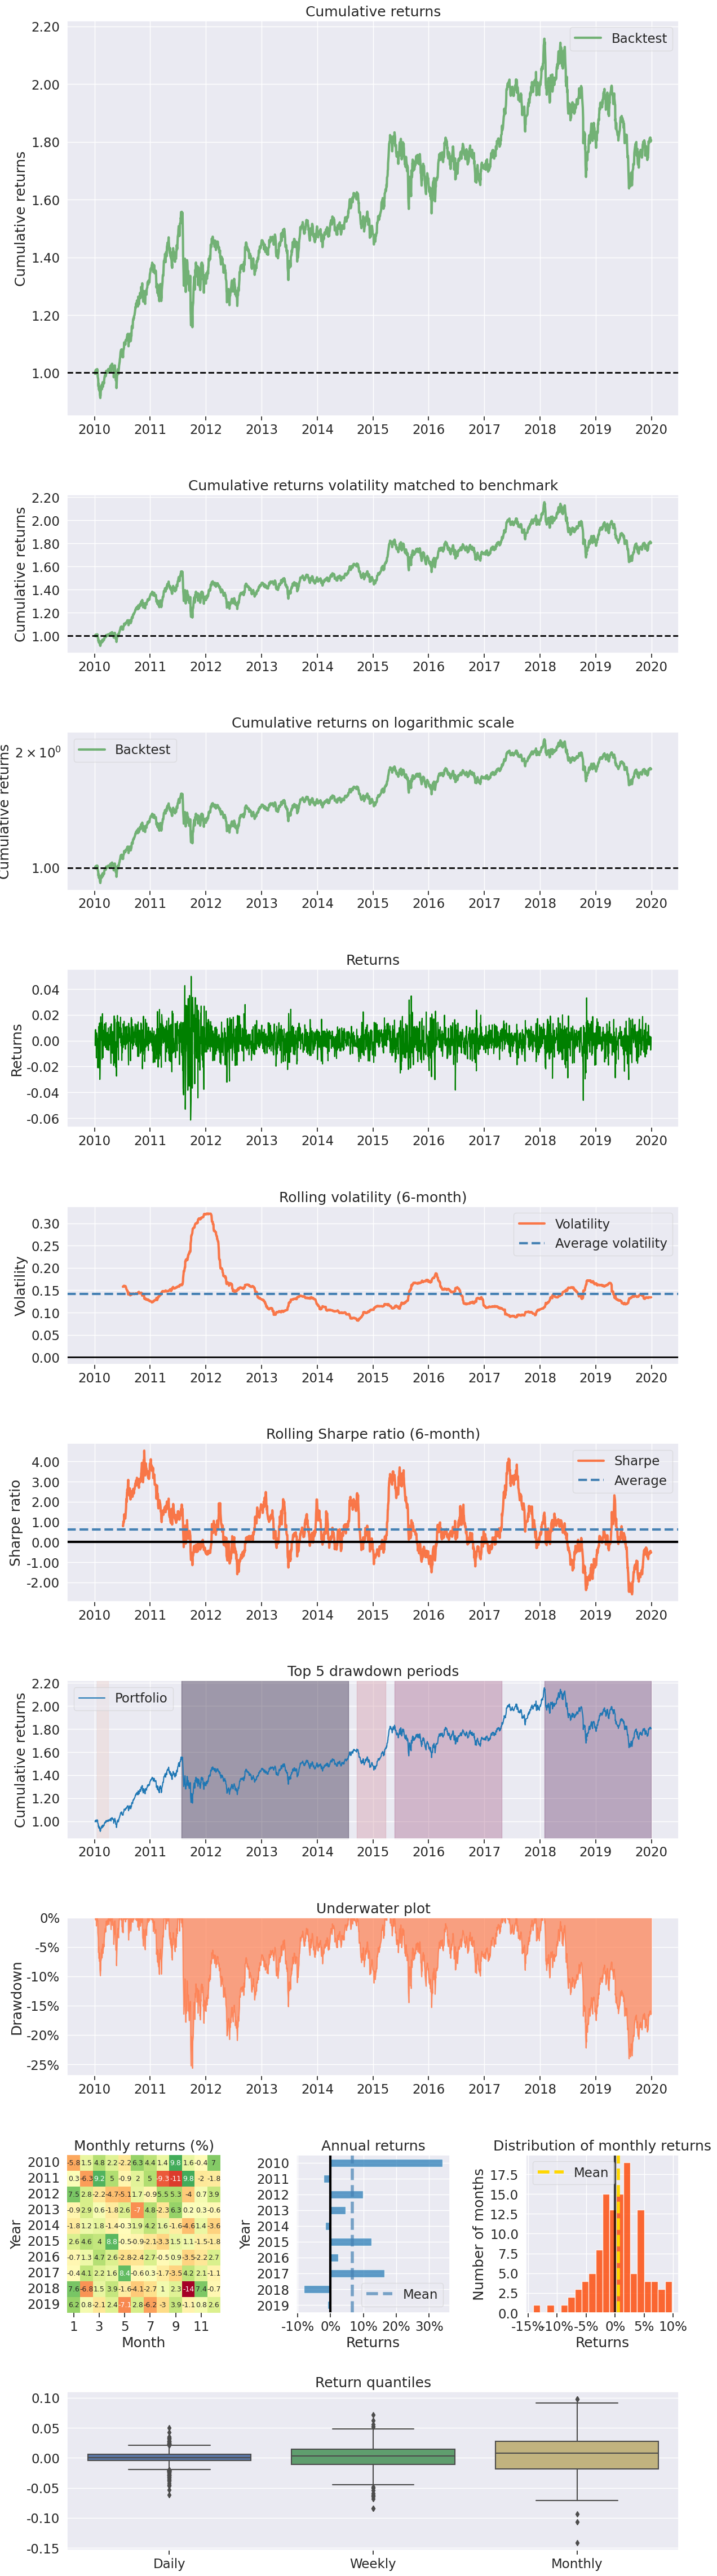

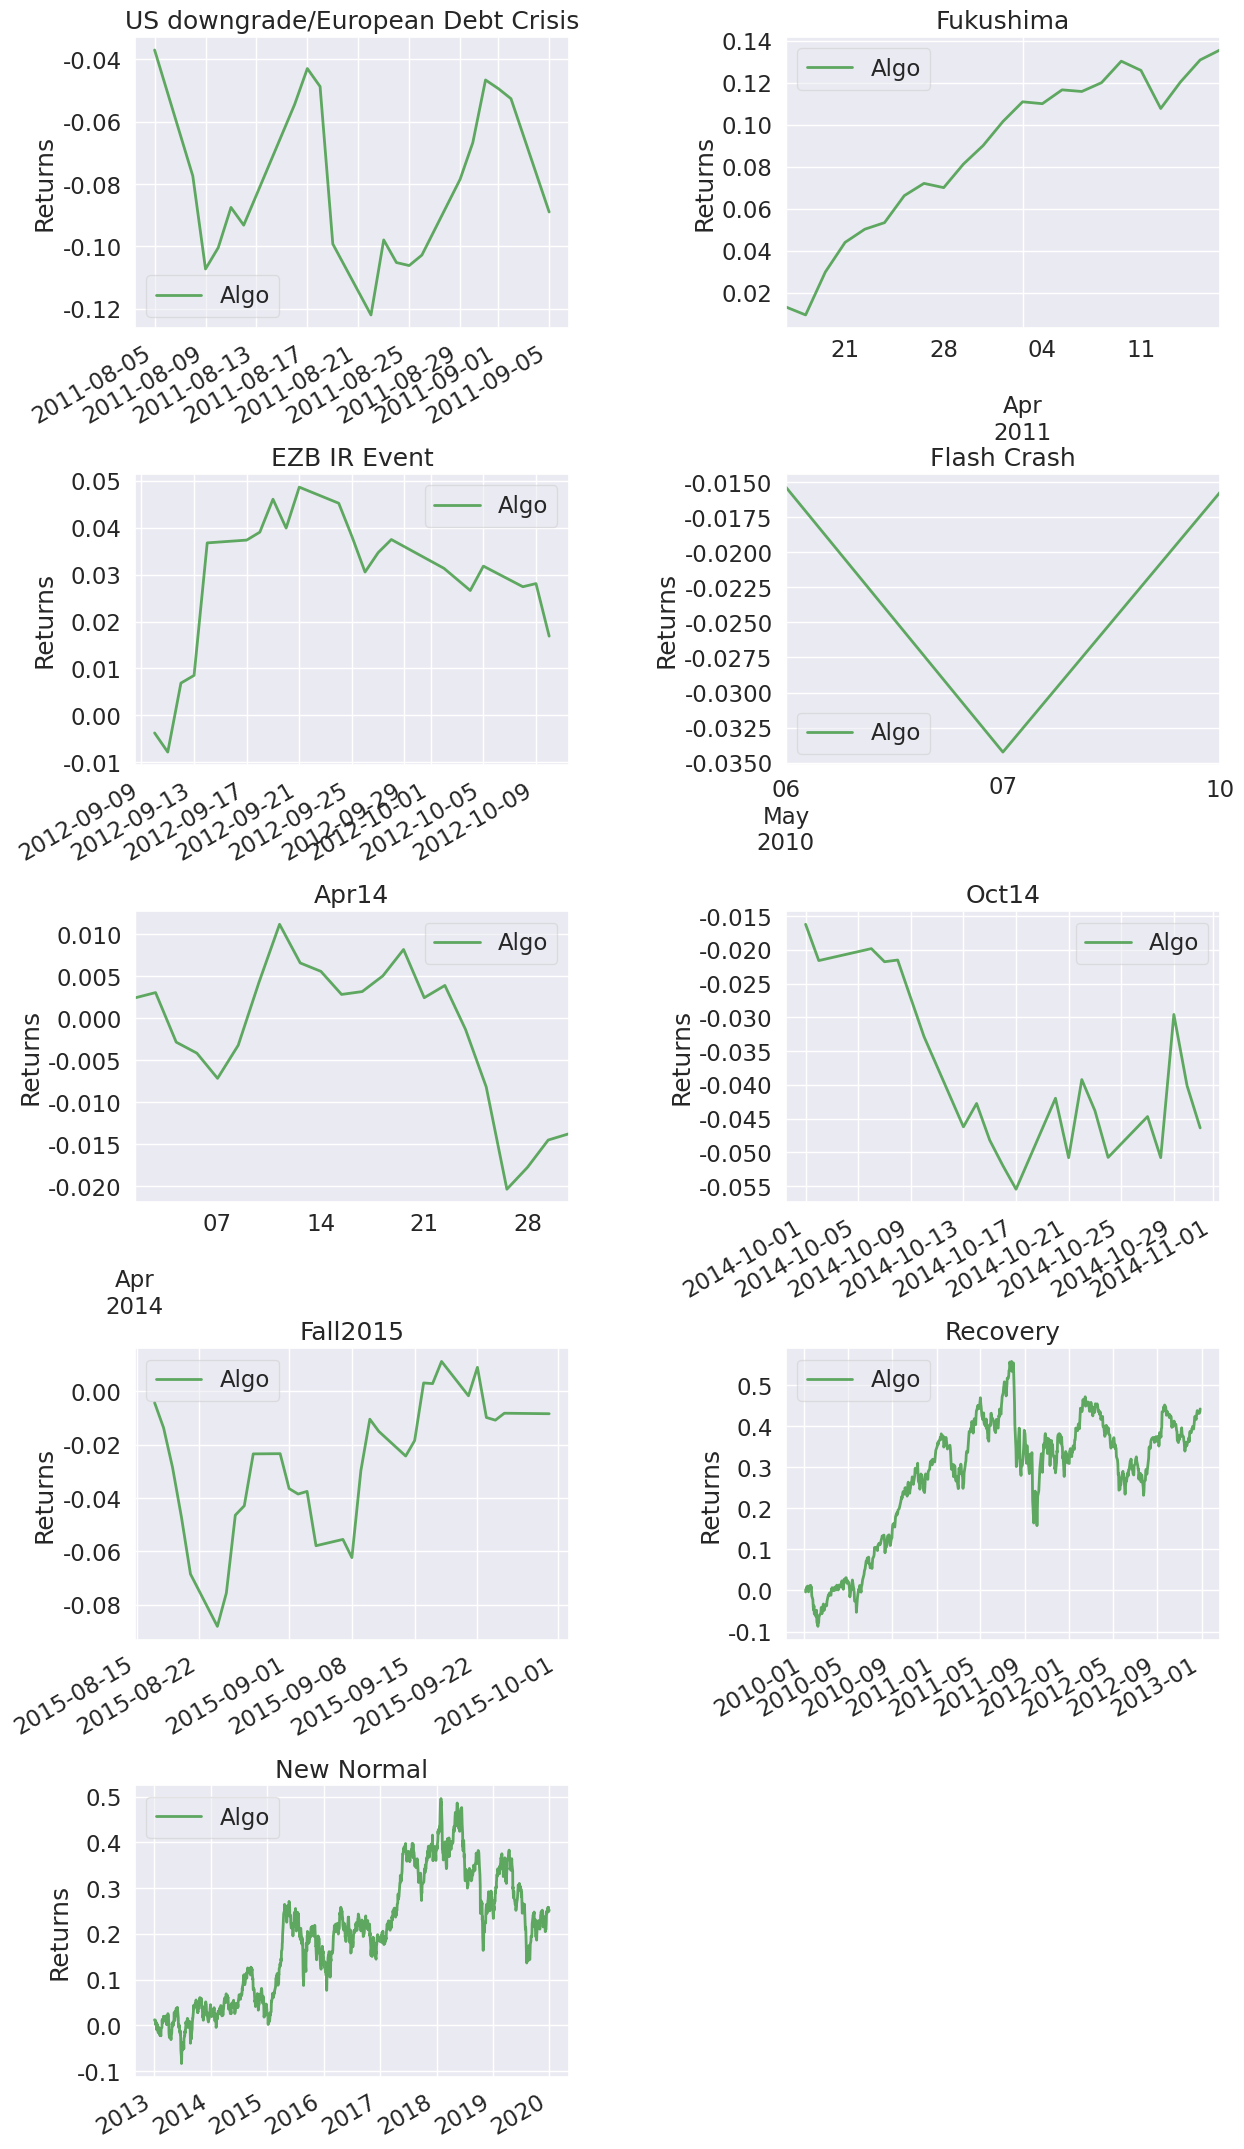

In [19]:
pf.create_full_tear_sheet(df_rtn)

# 종목 구성비 알아보기

In [20]:
list = pd.read_csv('../datasets/ticker_by_field.csv', encoding='utf-8')
list.drop(columns='Unnamed: 0', inplace = True)
list.rename(columns={'종목코드':'ticker', '산업군':'field'}, inplace=True)

In [21]:
list

,ticker,field
0,383220,섬유의복
1,20000,섬유의복
2,105630,섬유의복
3,93050,섬유의복
4,3610,섬유의복
...,...,...
788,15020,서비스업
789,145270,서비스업
790,204210,서비스업
791,140910,서비스업


In [22]:
# 거래소 코드 6개로 맞춰주기
for j in list.index:
        if len(str(list.loc[j,"ticker"])) < 6:
            list.loc[j,"ticker"] = \
            '0'*(6-len(str(list.loc[j,"ticker"])))\
                    +str(list.loc[j,"ticker"])
        else:
            list.loc[j,"ticker"]= str(list.loc[j,"ticker"])


In [23]:
Low_vol = pd.read_csv('./datasets/low_vol_simple_rtn.csv', encoding='cp949')

In [24]:
type(Low_vol.groupby('name').first()['ticker'])

pandas.core.series.Series

In [25]:
temp.reset_index(drop=False)

NameError: name 'temp' is not defined

In [ ]:
temp = Low_vol.groupby('name').first()['ticker']
temp = temp.reset_index(drop=False)
# 거래소 코드 6개로 맞춰주기
for j in temp.index:
        if len(str(temp.loc[j,"ticker"])) < 6:
            temp.loc[j,"ticker"] = \
            '0'*(6-len(str(temp.loc[j,"ticker"])))\
                    +str(temp.loc[j,"ticker"])
        else:
            temp.loc[j,"ticker"]= str(temp.loc[j,"ticker"])


In [ ]:
fin = pd.merge(temp, list, on='ticker', how='left')

In [ ]:
fin['field'].value_counts()

금융업      41
화학       21
서비스업     20
유통업      18
전기전자     13
운수장비     13
보험        9
철강금속      8
운수창고업     6
의약품       6
건설업       5
기계        5
증권        5
비금속광물     3
섬유의복      3
전기가스업     3
통신업       1
Name: field, dtype: int64

In [ ]:
fin['field'].value_counts().to_csv('../../../../low.csv', encoding='cp949')